In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#read csv into pandas
df=pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter the DF to only the currency that is currently being traded. 
IsTrading_df=df[df['IsTrading']==True]
IsTrading_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Drop IsTrading Column
IsTrading_df=IsTrading_df.drop('IsTrading', axis= 1).drop('Unnamed: 0', axis = 1)
IsTrading_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#remove all rows with null values
IsTrading_df = IsTrading_df.dropna()
IsTrading_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [6]:
#filter df so total coins mined is greater than 0
IsTrading_df = IsTrading_df[IsTrading_df['TotalCoinsMined'] > 0]
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#create Coinname df tyo use later
Cn_df = IsTrading_df["CoinName"].reset_index(drop = True)
#Drop Coinname
IsTrading_df=IsTrading_df.drop('CoinName', axis= 1).reset_index(drop = True)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2000000000
528,Scrypt,PoW/PoS,1.493105e+07,250000000
529,CryptoNight,PoW,9.802226e+08,1400222610
530,Equihash,PoW,7.296538e+06,21000000


In [8]:
Cn_df

0          42 Coin
1          404Coin
2        EliteCoin
3          Bitcoin
4         Ethereum
          ...     
527         ZEPHYR
528        Gapcoin
529         Beldex
530        Horizen
531    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [9]:
# Transform catogoriacal data to numerical data
ColumnsToBeEncoded=['Algorithm', 'ProofType']
for column in ColumnsToBeEncoded:
    le=LabelEncoder()
    IsTrading_df[column] = le.fit_transform(IsTrading_df[column].values)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52,15,4.199995e+01,42
1,52,15,1.055185e+09,532000000
2,66,15,2.927942e+10,314159265359
3,47,12,1.792718e+07,21000000
4,20,12,1.076842e+08,0
...,...,...,...,...
527,47,1,2.000000e+09,2000000000
528,52,15,1.493105e+07,250000000
529,10,12,9.802226e+08,1400222610
530,18,12,7.296538e+06,21000000


In [10]:
# Scale the data
scaler = StandardScaler().fit(IsTrading_df)
scaled_IsTrading_df = scaler.transform(IsTrading_df)
print(scaled_IsTrading_df)

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 ...
 [-2.14047761e+00  1.67233875e-03 -9.56133629e-02 -1.32179374e-01]
 [-1.66106109e+00  1.67233875e-03 -1.16948169e-01 -1.52559984e-01]
 [ 3.76459118e-01 -1.48113469e+00 -1.17105357e-01 -1.52855521e-01]]


In [11]:
# Applying PCA to reduce dimensions to 90% of the explained variance. 
pca =PCA(n_components=0.90)

In [12]:
# Get principal components of the data
crypto_pca = pca.fit_transform(scaled_IsTrading_df)

In [13]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal componenet 3"]
)
crypto_pca_df.head()

,principal component 1,principal component 2,principal componenet 3
0,-0.417875,0.810296,0.372138
1,-0.396564,0.815135,0.373256
2,3.124076,2.209780,0.504335
3,-0.192083,0.016266,-0.072910
4,-0.044116,-1.167492,1.012525


In [14]:
# Fetch the explained variance.
pca.explained_variance_ratio_

array([0.4350467 , 0.28670411, 0.20538956])

In [15]:
# Perform t-SNE on the Principle components
tsne = TSNE(learning_rate = 100)
transformed_crypto = tsne.fit_transform(crypto_pca)
transformed_crypto[0]

C:\Users\Rome\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([  2.037596, -30.054647], dtype=float32)

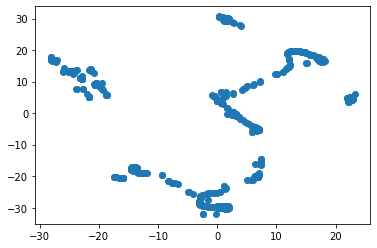

In [16]:
# Create scatter plot from t-SNE data
x = transformed_crypto[:,0]
y = transformed_crypto[:,1]
plt.scatter(x, y)
plt.show()

In [17]:
# Identify best number of clusters using elbow curve
inertia = []
k = list(range(1, 11))

In [18]:
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_crypto)
    inertia.append(km.inertia_)

C:\Users\Rome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [19]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,275725.968750
1,2,137035.359375
2,3,61648.578125
3,4,38277.015625
4,5,26955.984375


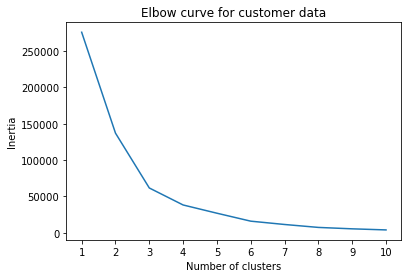

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [21]:
#create tsne dataframe
transform_crypto_df=pd.DataFrame(transformed_crypto).reset_index(drop=True)
transform_crypto_df

,0,1
0,2.037596,-30.054647
1,-1.698465,-25.507454
2,6.198011,9.106179
3,22.856693,4.941350
4,3.086092,-0.394162
...,...,...
527,-23.750280,7.731976
528,-3.049223,-28.496069
529,0.595876,4.163959
530,2.599312,0.322113


In [22]:
# Fit and predict model
model = KMeans(n_clusters=4, random_state=0)
model.fit(transformed_crypto)
predictions = model.predict(transformed_crypto)

In [23]:
# Add class column to the DF
transform_crypto_df['class']=model.labels_
transform_crypto_df

,0,1,class
0,2.037596,-30.054647,0
1,-1.698465,-25.507454,0
2,6.198011,9.106179,2
3,22.856693,4.941350,2
4,3.086092,-0.394162,2
...,...,...,...
527,-23.750280,7.731976,3
528,-3.049223,-28.496069,0
529,0.595876,4.163959,2
530,2.599312,0.322113,2


In [24]:
clustered_df=pd.concat([Cn_df, transform_crypto_df],axis=1, sort=False)
clustered_df

,CoinName,0,1,class
0,42 Coin,2.037596,-30.054647,0
1,404Coin,-1.698465,-25.507454,0
2,EliteCoin,6.198011,9.106179,2
3,Bitcoin,22.856693,4.941350,2
4,Ethereum,3.086092,-0.394162,2
...,...,...,...,...
527,ZEPHYR,-23.750280,7.731976,3
528,Gapcoin,-3.049223,-28.496069,0
529,Beldex,0.595876,4.163959,2
530,Horizen,2.599312,0.322113,2


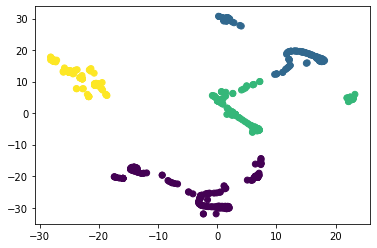

In [25]:
plt.scatter(clustered_df[0], clustered_df[1], c=clustered_df['class'])
plt.show()


In [26]:
#As you can see above these cryptocurrencies can be clustered together.
#There are a total of 4 clusters, below i will show 
#which cryptocurrencies belong to each cluster 

In [27]:
cluster1=clustered_df[clustered_df['class']==0]
cluster1

,CoinName,0,1,class
0,42 Coin,2.037596,-30.054647,0
1,404Coin,-1.698465,-25.507454,0
6,Dash,-13.795023,-17.250544,0
12,BitcoinDark,6.864798,-20.375023,0
15,KoboCoin,-17.053717,-20.414570,0
...,...,...,...,...
511,OKCash,6.420856,-20.093601,0
514,WhiteCoin,-2.915702,-26.835968,0
515,FriendshipCoin,7.377268,-16.065937,0
517,Triangles Coin,-15.936286,-20.706324,0


In [29]:
cluster2=clustered_df[clustered_df['class']==1]
cluster2

,CoinName,0,1,class
5,Litecoin,14.324901,19.387262,1
14,ProsperCoin,17.564598,17.292171,1
16,Spreadcoin,2.065292,29.930738,1
17,Argentum,16.183613,18.297836,1
23,SexCoin,12.108514,19.479704,1
...,...,...,...,...
487,SolarCoin,10.034371,12.443288,1
496,Crypto Escudo,12.130894,17.086258,1
502,SmileyCoin,10.020553,12.444840,1
508,Bata,17.387907,16.466038,1


In [31]:
cluster3=clustered_df[clustered_df['class']==2]
cluster3

,CoinName,0,1,class
2,EliteCoin,6.198011,9.106179,2
3,Bitcoin,22.856693,4.941350,2
4,Ethereum,3.086092,-0.394162,2
7,Monero,0.661646,3.211574,2
8,Ethereum Classic,2.947121,-0.508671,2
...,...,...,...,...
518,Vollar,2.555943,-0.248111,2
520,Reality Clash,3.097167,-0.382724,2
525,BitTorrent,4.975564,8.691333,2
529,Beldex,0.595876,4.163959,2


In [34]:
cluster4=clustered_df[clustered_df['class']==3]
cluster4

,CoinName,0,1,class
10,Bitshares,-24.198540,12.621770,3
13,PayCoin,-23.190384,11.195582,3
34,CasinoCoin,-21.563206,13.800824,3
42,Exclusive Coin,-20.191799,9.329718,3
50,HyperStake,-27.378929,16.654285,3
...,...,...,...,...
523,Waves,-21.950785,5.951329,3
524,Particl,-20.708447,8.874540,3
526,Nxt,-19.455145,9.710259,3
527,ZEPHYR,-23.750280,7.731976,3
